In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
l = -np.log10(0.05)

def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, name):
    barplot(df,title= name, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

go_BP
go_MF
go_CC
go_reactome


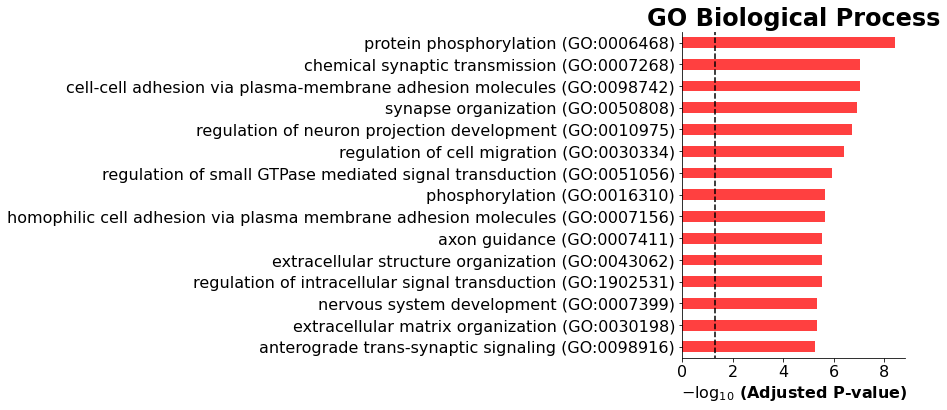

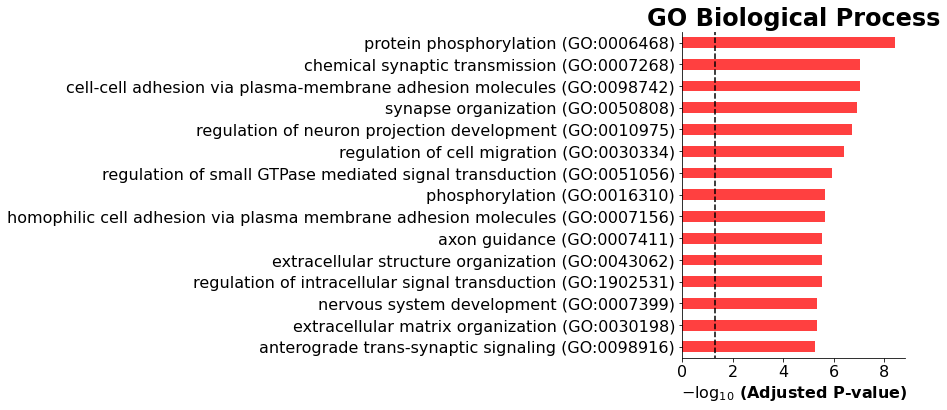

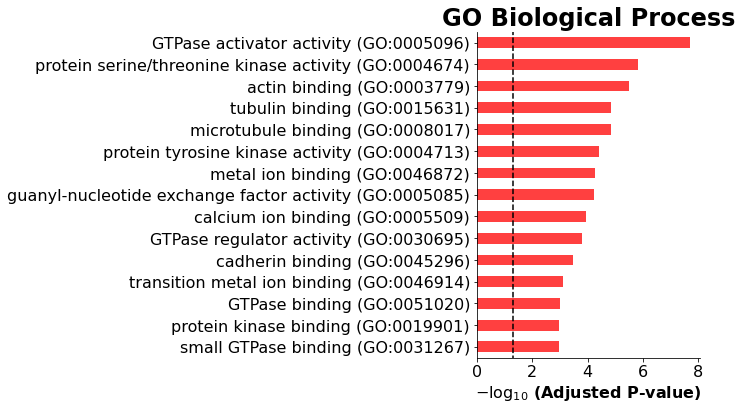

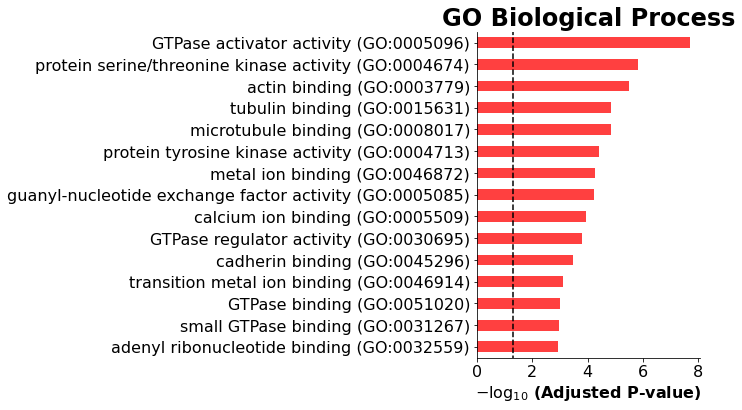

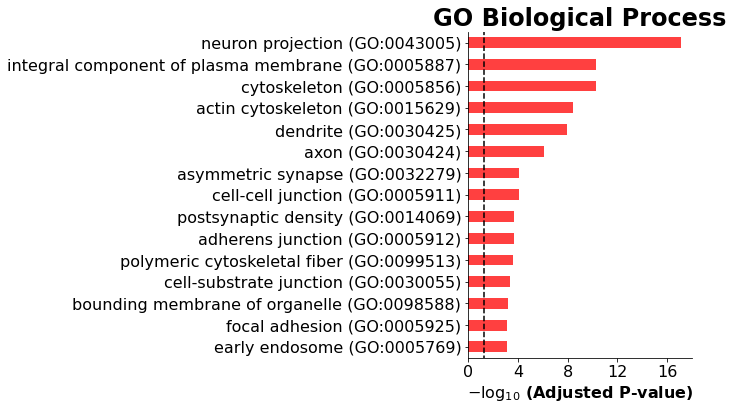

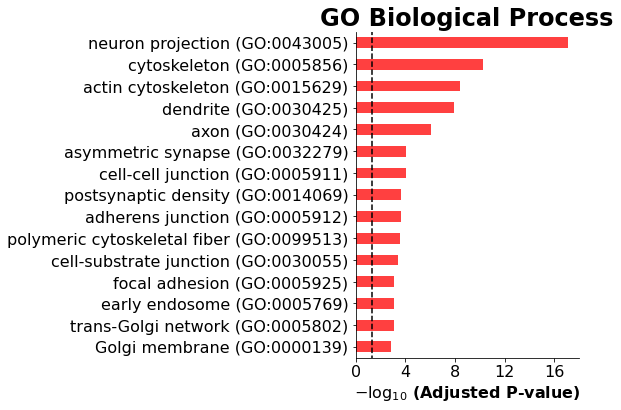

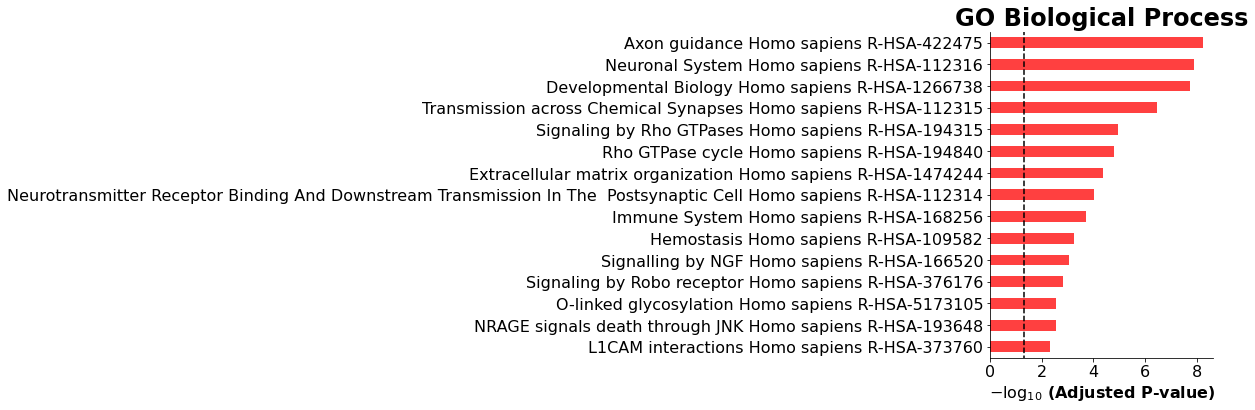

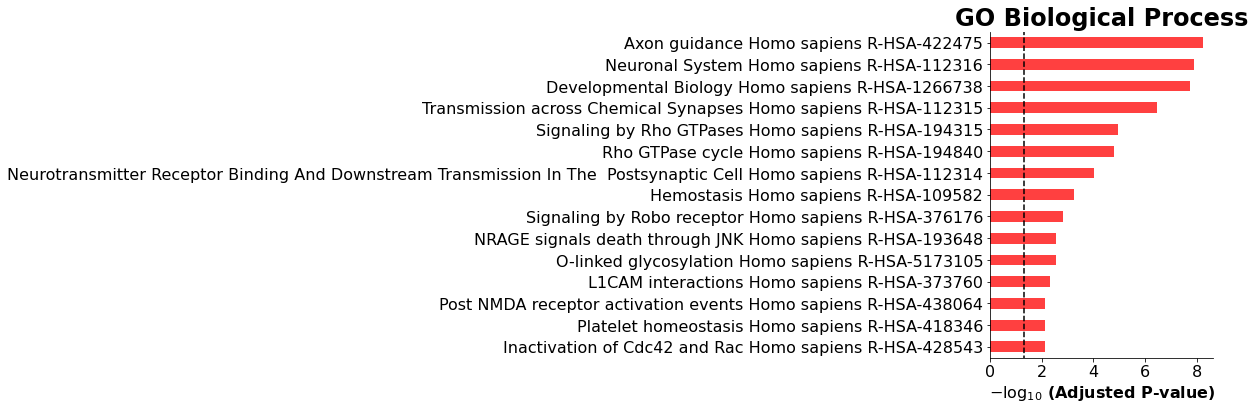

In [25]:
#from statsmodels.sandbox.stats.multicomp import multipletests
names2 = ['GO Biological Process', 'GO Molecular Function', 'GO Cellular Process', 'GO Biological Process']

path = '/vggpfs/fs3/vgl/store/adenisova/data/innovation/branch_analysis/test_october/test_gerp/coursework_results/GO_terms_results/'#'/Users/aleksandradenisova/Desktop/coursework/'
names = ['go_BP', 'go_MF', 'go_CC', 'go_reactome']
#proc = [go_BP, go_MF, go_CC, go_reactome]

for nim in range(4):
    df = pd.read_csv(f'{path}permutations_n_terms_'+names[nim]+'_new2.csv', low_memory=False)
    df_T = df[df.columns[6:]].T

    df = df.sort_values(by = 'Adjusted P-value')
    df['less'] = (df_T <= df_T.iloc[0]).sum(axis=0)
    df['p_val_perm'] = df['less']/35

    df[['p_val_perm','less','Gene_set', 'Overlap', 'P-value', 'Odds Ratio', 'Genes', 'Term',
           'Adjusted P-value','2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
           '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
           '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']].to_csv(f'{path}permutations_n_terms_'+names[nim]+'_perm.csv', index = False)

    name = names[nim]

    plot(df, 'GO Biological Process')
    plot(df[df['p_val_perm']<=0.5], 'GO Biological Process')

    
# plot(df[df['p_val_perm']<=0.05], name)